## Importing libraries

In [1]:
### importing libraries

from datetime import datetime
from collections import defaultdict
from tqdm import tqdm

import numpy as np
import pandas as pd

import json
import os

## Utility functions

In [2]:
def get_info_from_timestamp(timestamp,date_and_time = True,year=True,month=True,day=True,hour=True,minute=True,second=False,weekday=True,weeknumber=True):
    base = datetime.fromtimestamp(timestamp)
    return_di = {}
    if date_and_time:
        return_di['date_time'] = base.strftime("%m/%d/%Y, %H:%M")
    if year:
        return_di['year'] = base.strftime('%Y')
    if month:
        return_di['month'] = base.strftime("%m")
    if day:
        return_di['day'] = base.strftime("%d")
    if hour:
        return_di['hours'] = base.strftime("%H")
    if minute:
        return_di['minute'] = base.strftime("%M")
    if second:
        return_di['second'] = base.strftime("%S")
    if weekday:
        return_di['weekday'] = base.strftime("%a")
    if weeknumber:
        return_di['weeknumber'] = base.strftime("%W")

    return return_di

## Data Setup

In [3]:
### seting the data directory

EMA_rel_path = 'data/dataset/EMA/response/'

In [4]:
cwd = os.getcwd()
cwd

'/home/sidd/workspace/Student-Stress-Prediction'

In [5]:
EMA_abs_path = os.path.join(cwd,EMA_rel_path)
EMA_abs_path

'/home/sidd/workspace/Student-Stress-Prediction/data/dataset/EMA/response/'

### Different "LABEL" EMA files

In [6]:
### counting length of different "category" EMA files

stress_EMA_usr_files = os.listdir(os.path.join(EMA_abs_path,'Stress'))
mood2_EMA_usr_files = os.listdir(os.path.join(EMA_abs_path,'Mood 2'))


len(stress_EMA_usr_files),len(mood2_EMA_usr_files)

(49, 49)

In [7]:
stress_EMA_usr_files[0],mood2_EMA_usr_files[0]

('Stress_u52.json', 'Mood 2_u30.json')

In [8]:
### Loading and Reading stress EMA files

def get_json_di(EMA_usr_files_li,ema_abs_path,EMA_folder_name):
    json_di = {}

    for filename in EMA_usr_files_li:
        filename_abs_path = os.path.join(ema_abs_path,EMA_folder_name,filename)
        #print(filename_abs_path)
        with open(filename_abs_path) as f:
            json_di[filename] = json.load(f)


    print("No of EMA files in : ", EMA_folder_name," : ", len(json_di))

    return json_di



In [9]:
### Loading and Reading EMA files

stress_json_di = get_json_di(stress_EMA_usr_files,EMA_abs_path,'Stress')
mood2_json_di = get_json_di(mood2_EMA_usr_files,EMA_abs_path,'Mood 2')

No of EMA files in :  Stress  :  49
No of EMA files in :  Mood 2  :  49


In [10]:
# ### Loading and Reading mood 2 EMA files

# mood2_json_di = {}

# for filename in mood2_EMA_usr_files:
#     filename_abs_path = os.path.join(EMA_abs_path,'Mood 2',filename)
#     #print(filename_abs_path)
#     with open(filename_abs_path) as f:
#         stress_json_di[filename] = json.load(f)


# print(len(stress_json_di))

### Extracting different EMA files data

In [11]:
def get_mood2_ema_df(json_di):
    
    ema_mood2_data_di = defaultdict(list)


    for user, val in tqdm(json_di.items()):
        usr_id = user.split('.')[0].split('_')[1]
        

        for json_val in val:
            if 'how' in json_val:
                
                ema_mood2_data_di['user_id'].append(usr_id)
                

                time_info_di = get_info_from_timestamp(json_val['resp_time'])
                for k,v in time_info_di.items():
                    ema_mood2_data_di[k].append(v)

                ema_mood2_data_di['label_source'].append("mood2_ema")                
                ema_mood2_data_di['rating'].append(json_val['how'])

    return pd.DataFrame(ema_mood2_data_di)

In [12]:
def get_stress_ema_df(stress_json_di):
    
    ema_stress_data_di = defaultdict(list)


    for user, val in tqdm(stress_json_di.items()):
        usr_id = user.split('.')[0].split('_')[1]
        

        for json_val in val:
            if 'level' in json_val:
                
                ema_stress_data_di['user_id'].append(usr_id)
                

                time_info_di = get_info_from_timestamp(json_val['resp_time'])
                for k,v in time_info_di.items():
                    ema_stress_data_di[k].append(v)

                ema_stress_data_di['label_source'].append("stress_ema")                
                ema_stress_data_di['rating'].append(json_val['level'])

    return pd.DataFrame(ema_stress_data_di)

### Stress and Mood 2 EMA df's info

In [13]:
stress_ema_df = get_stress_ema_df(stress_json_di)

stress_ema_df.head()

100%|██████████| 49/49 [00:00<00:00, 1120.95it/s]


,user_id,date_time,year,month,day,hours,minute,weekday,weeknumber,label_source,rating
0,u52,"03/30/2013, 15:24",2013,03,30,15,24,Sat,12,stress_ema,2
1,u52,"03/28/2013, 15:03",2013,03,28,15,03,Thu,12,stress_ema,1
2,u52,"03/31/2013, 15:11",2013,03,31,15,11,Sun,12,stress_ema,2
3,u52,"04/02/2013, 17:24",2013,04,02,17,24,Tue,13,stress_ema,1
4,u52,"04/02/2013, 23:44",2013,04,02,23,44,Tue,13,stress_ema,5


In [14]:
# for a,b in ema_stress_data_di.items():
#     print(a,len(b))

In [15]:
stress_ema_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       2167 non-null   object
 1   date_time     2167 non-null   object
 2   year          2167 non-null   object
 3   month         2167 non-null   object
 4   day           2167 non-null   object
 5   hours         2167 non-null   object
 6   minute        2167 non-null   object
 7   weekday       2167 non-null   object
 8   weeknumber    2167 non-null   object
 9   label_source  2167 non-null   object
 10  rating        2167 non-null   object
dtypes: object(11)
memory usage: 186.4+ KB


In [16]:
stress_ema_df.describe()

,user_id,date_time,year,month,day,hours,minute,weekday,weeknumber,label_source,rating
count,2167,2167,2167,2167,2167,2167,2167,2167,2167,2167,2167
unique,48,1907,1,5,31,24,60,7,13,1,5
top,u59,"05/01/2013, 02:16",2013,04,29,21,00,Wed,13,stress_ema,1
freq,269,8,2167,1328,134,215,166,374,429,2167,974


In [17]:
mood2_ema_df = get_mood2_ema_df(mood2_json_di)

mood2_ema_df.head()

100%|██████████| 49/49 [00:00<00:00, 4671.57it/s]


,user_id,date_time,year,month,day,hours,minute,weekday,weeknumber,label_source,rating
0,u17,"04/26/2013, 16:09",2013,04,26,16,09,Fri,16,mood2_ema,2
1,u17,"04/26/2013, 00:27",2013,04,26,00,27,Fri,16,mood2_ema,2
2,u17,"04/27/2013, 17:23",2013,04,27,17,23,Sat,16,mood2_ema,3
3,u17,"04/28/2013, 21:33",2013,04,28,21,33,Sun,16,mood2_ema,2
4,u17,"05/13/2013, 20:59",2013,05,13,20,59,Mon,19,mood2_ema,2


In [18]:
mood2_ema_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       417 non-null    object
 1   date_time     417 non-null    object
 2   year          417 non-null    object
 3   month         417 non-null    object
 4   day           417 non-null    object
 5   hours         417 non-null    object
 6   minute        417 non-null    object
 7   weekday       417 non-null    object
 8   weeknumber    417 non-null    object
 9   label_source  417 non-null    object
 10  rating        417 non-null    object
dtypes: object(11)
memory usage: 36.0+ KB


In [19]:
mood2_ema_df.describe()

,user_id,date_time,year,month,day,hours,minute,weekday,weeknumber,label_source,rating
count,417,417,417,417,417,417,417,417,417,417,417
unique,37,398,1,3,31,22,60,7,7,1,3
top,u59,"05/10/2013, 17:00",2013,05,26,17,00,Fri,18,mood2_ema,1
freq,98,3,417,338,30,124,30,81,109,417,180


### Plotting Stress and Mood 2 df value spread

[Text(0, 0, '98'),
 Text(0, 0, '36'),
 Text(0, 0, '24'),
 Text(0, 0, '19'),
 Text(0, 0, '18'),
 Text(0, 0, '18'),
 Text(0, 0, '16'),
 Text(0, 0, '15'),
 Text(0, 0, '15'),
 Text(0, 0, '13'),
 Text(0, 0, '12'),
 Text(0, 0, '12'),
 Text(0, 0, '12'),
 Text(0, 0, '11'),
 Text(0, 0, '11'),
 Text(0, 0, '8'),
 Text(0, 0, '7'),
 Text(0, 0, '7'),
 Text(0, 0, '7'),
 Text(0, 0, '7'),
 Text(0, 0, '6'),
 Text(0, 0, '6'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1')]

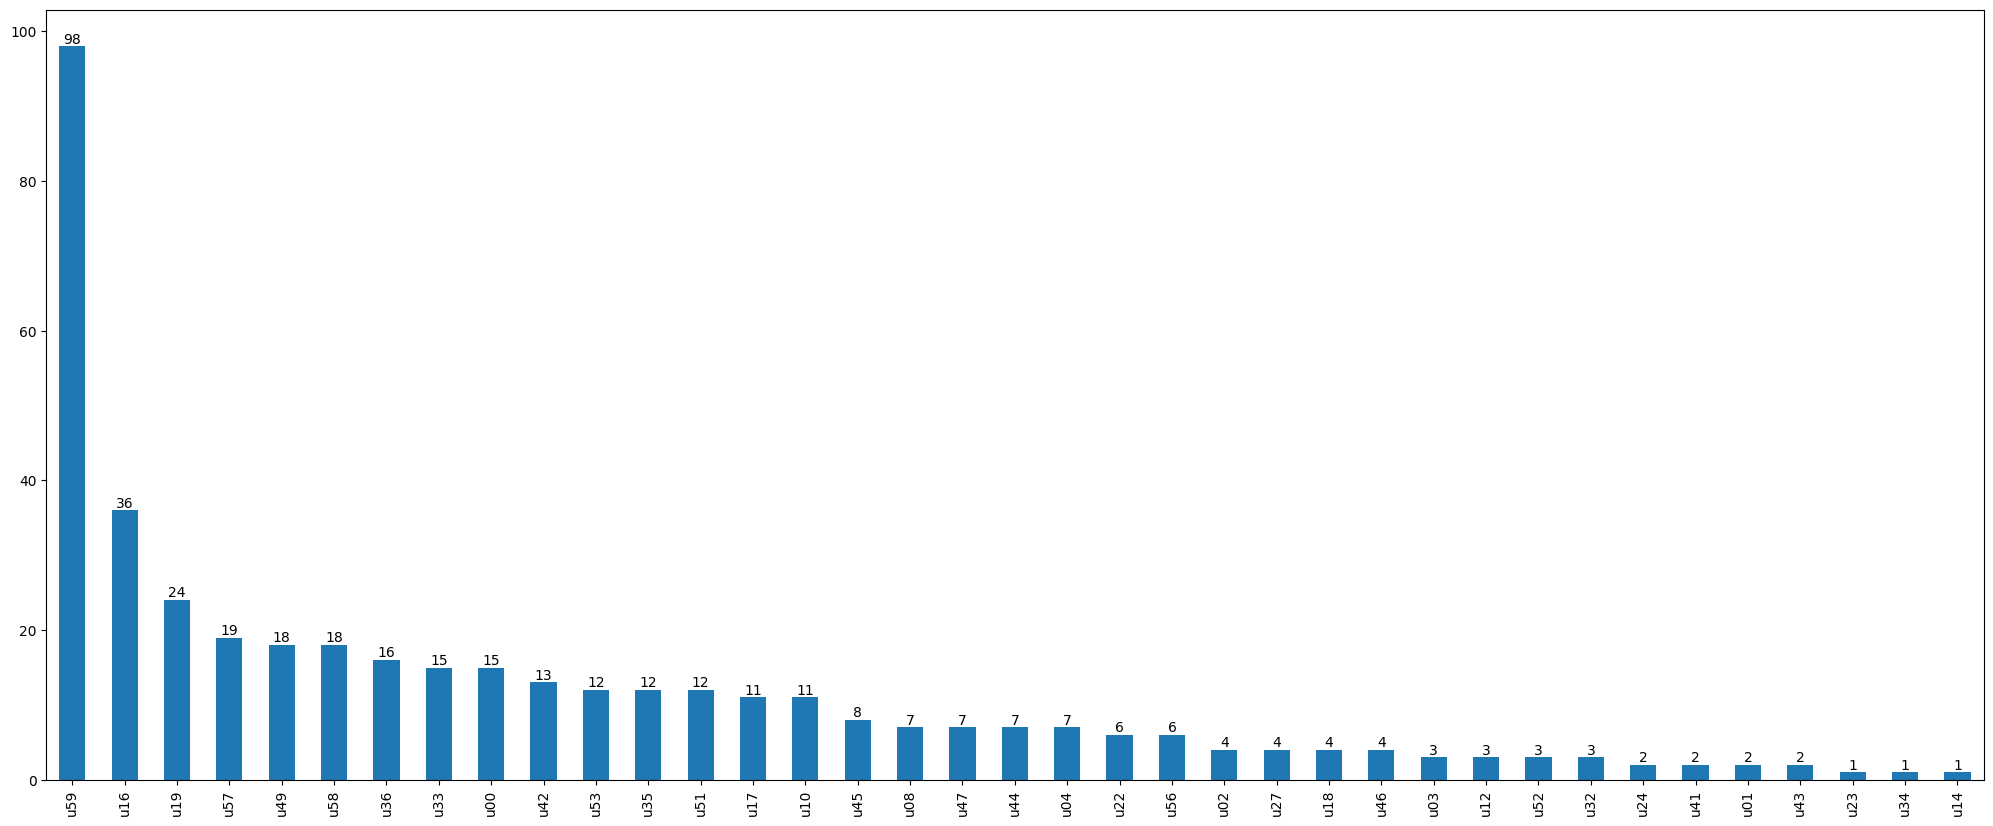

In [20]:
ax = mood2_ema_df['user_id'].value_counts().plot.bar(figsize=(25, 10))
ax.bar_label(ax.containers[0])

[Text(0, 0, '180'), Text(0, 0, '131'), Text(0, 0, '106')]

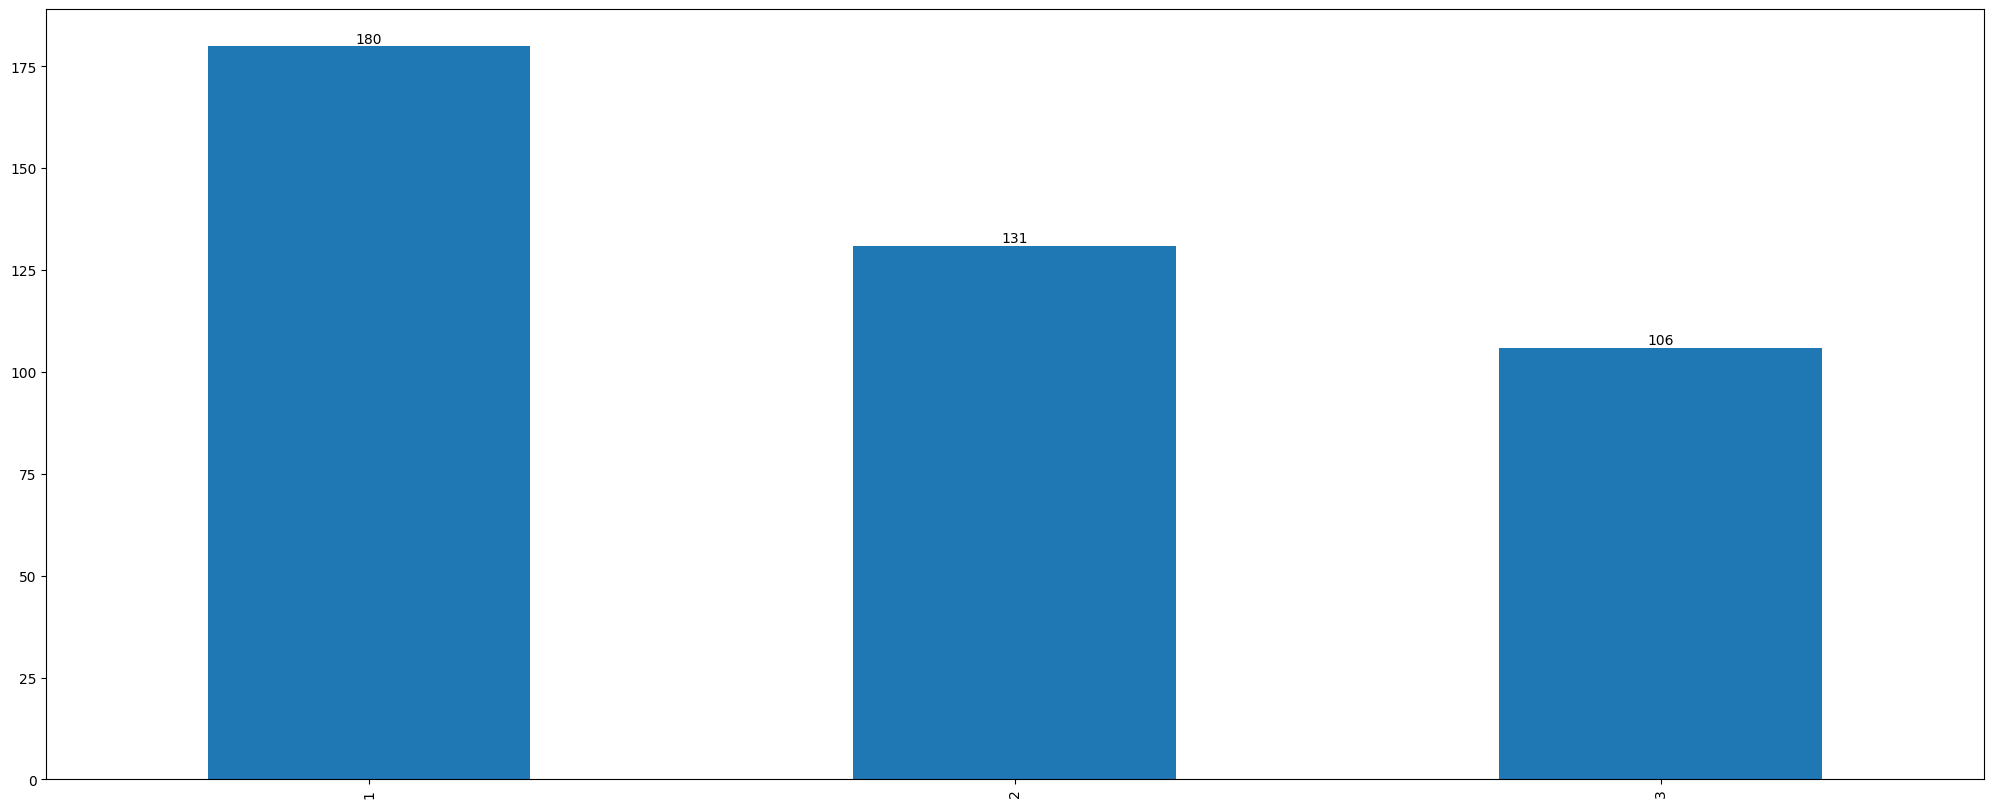

In [21]:
ax = mood2_ema_df['rating'].value_counts().plot.bar(figsize=(25, 10))
ax.bar_label(ax.containers[0])

In [22]:
# ### Data processing


# stress_ema_df['date_time'] = pd.to_datetime(stress_ema_df['date_time'])
# stress_ema_df = stress_ema_df.set_index('date_time')


In [23]:
stress_ema_df.head()

,user_id,date_time,year,month,day,hours,minute,weekday,weeknumber,label_source,rating
0,u52,"03/30/2013, 15:24",2013,03,30,15,24,Sat,12,stress_ema,2
1,u52,"03/28/2013, 15:03",2013,03,28,15,03,Thu,12,stress_ema,1
2,u52,"03/31/2013, 15:11",2013,03,31,15,11,Sun,12,stress_ema,2
3,u52,"04/02/2013, 17:24",2013,04,02,17,24,Tue,13,stress_ema,1
4,u52,"04/02/2013, 23:44",2013,04,02,23,44,Tue,13,stress_ema,5


In [24]:
len(stress_ema_df['user_id'].value_counts())

48

[Text(0, 0, '269'),
 Text(0, 0, '107'),
 Text(0, 0, '106'),
 Text(0, 0, '91'),
 Text(0, 0, '90'),
 Text(0, 0, '87'),
 Text(0, 0, '77'),
 Text(0, 0, '74'),
 Text(0, 0, '67'),
 Text(0, 0, '66'),
 Text(0, 0, '61'),
 Text(0, 0, '58'),
 Text(0, 0, '56'),
 Text(0, 0, '55'),
 Text(0, 0, '55'),
 Text(0, 0, '53'),
 Text(0, 0, '44'),
 Text(0, 0, '44'),
 Text(0, 0, '43'),
 Text(0, 0, '42'),
 Text(0, 0, '41'),
 Text(0, 0, '39'),
 Text(0, 0, '39'),
 Text(0, 0, '38'),
 Text(0, 0, '37'),
 Text(0, 0, '33'),
 Text(0, 0, '32'),
 Text(0, 0, '30'),
 Text(0, 0, '30'),
 Text(0, 0, '30'),
 Text(0, 0, '29'),
 Text(0, 0, '29'),
 Text(0, 0, '28'),
 Text(0, 0, '25'),
 Text(0, 0, '20'),
 Text(0, 0, '20'),
 Text(0, 0, '19'),
 Text(0, 0, '16'),
 Text(0, 0, '13'),
 Text(0, 0, '12'),
 Text(0, 0, '11'),
 Text(0, 0, '10'),
 Text(0, 0, '10'),
 Text(0, 0, '10'),
 Text(0, 0, '8'),
 Text(0, 0, '6'),
 Text(0, 0, '4'),
 Text(0, 0, '3')]

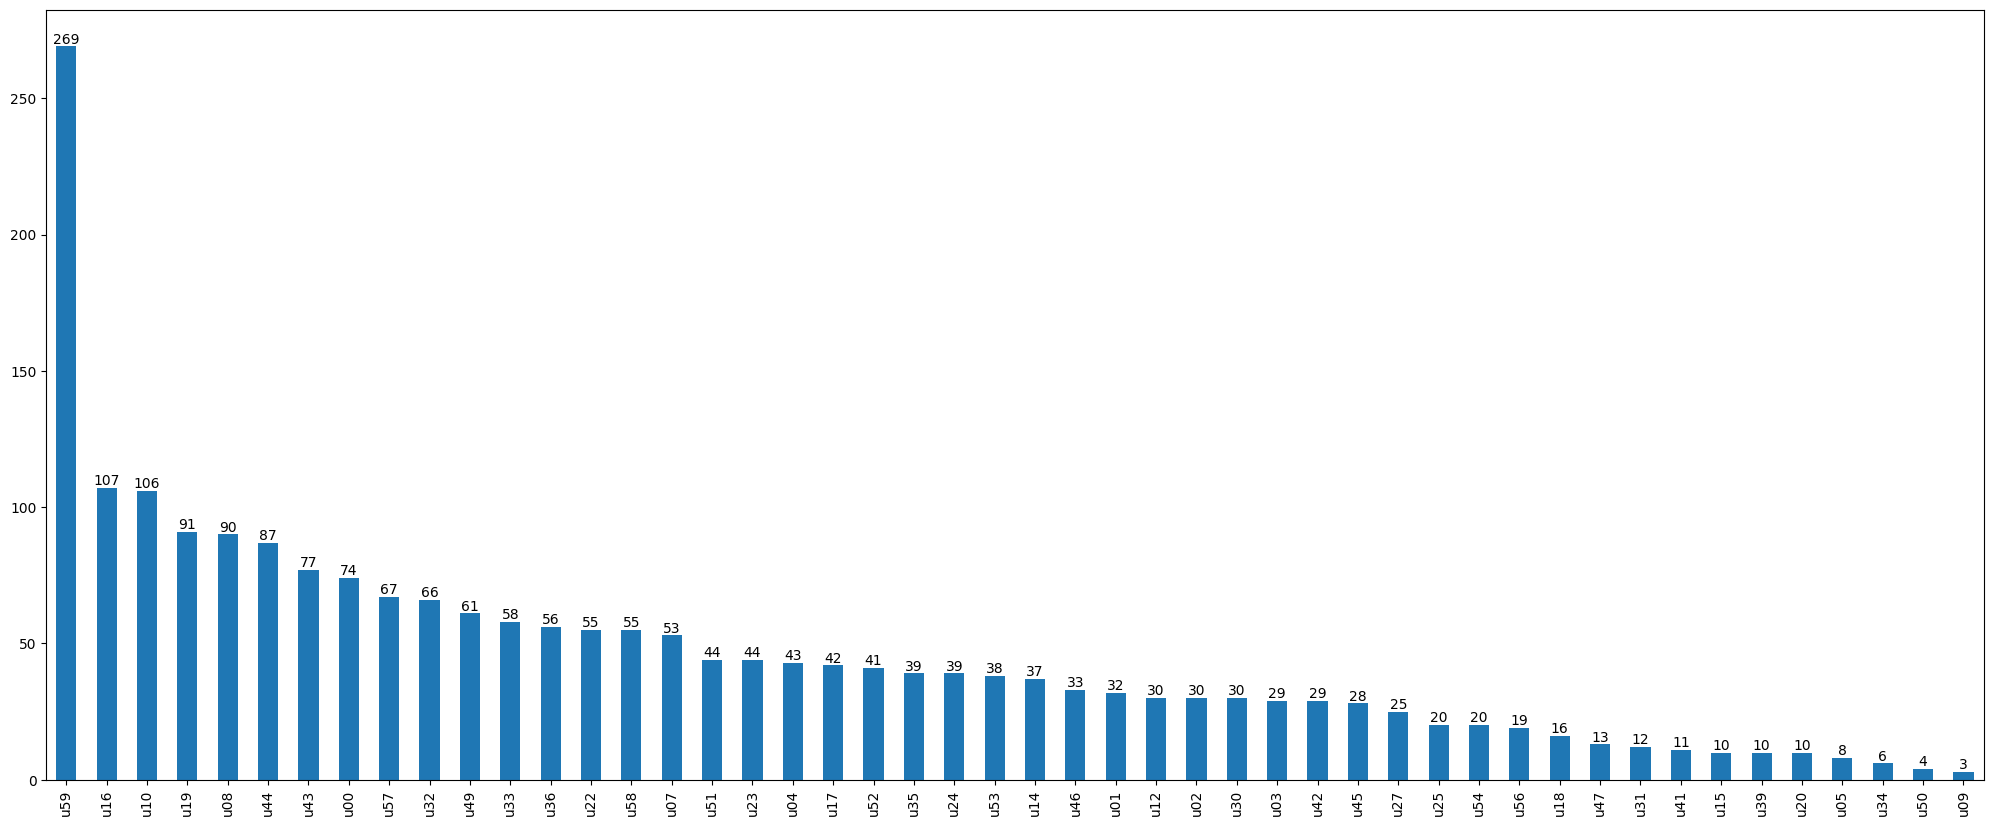

In [25]:
ax = stress_ema_df['user_id'].value_counts().plot.bar(figsize=(25, 10))
ax.bar_label(ax.containers[0])

In [26]:
stress_ema_df.head()

,user_id,date_time,year,month,day,hours,minute,weekday,weeknumber,label_source,rating
0,u52,"03/30/2013, 15:24",2013,03,30,15,24,Sat,12,stress_ema,2
1,u52,"03/28/2013, 15:03",2013,03,28,15,03,Thu,12,stress_ema,1
2,u52,"03/31/2013, 15:11",2013,03,31,15,11,Sun,12,stress_ema,2
3,u52,"04/02/2013, 17:24",2013,04,02,17,24,Tue,13,stress_ema,1
4,u52,"04/02/2013, 23:44",2013,04,02,23,44,Tue,13,stress_ema,5


[Text(0, 0, '974'),
 Text(0, 0, '457'),
 Text(0, 0, '347'),
 Text(0, 0, '266'),
 Text(0, 0, '123')]

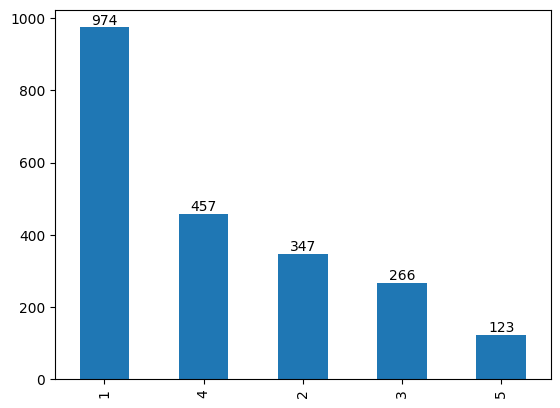

In [27]:
ax = stress_ema_df['rating'].value_counts().plot.bar()
ax.bar_label(ax.containers[0])

### Getting Predictor dfs

In [28]:
# social_EMA_usr_files = os.listdir(os.path.join(EMA_abs_path,'Social')) ## number
# class_EMA_usr_files = os.listdir(os.path.join(EMA_abs_path,'Class')) ## course_id,experience ## due
# sleep_EMA_usr_files = os.listdir(os.path.join(EMA_abs_path,'Sleep')) ## hour, rate, social
# activity_EMA_usr_files = os.listdir(os.path.join(EMA_abs_path,'Activity')) ## working, relaxing, other_working, other_relaxing
# exercise_EMA_usr_files = os.listdir(os.path.join(EMA_abs_path,'Exercise')) ## have, schedule, exercise, walk
# study_space_EMA_usr_files = os.listdir(os.path.join(EMA_abs_path,'Study Spaces')) ## productivity, noise
# events_EMA_usr_files = os.listdir(os.path.join(EMA_abs_path,'Events')) ## positive, negative
# dining_halls_EMA_usr_files = os.listdir(os.path.join(EMA_abs_path,'Dining Halls')) # breakfast, lunch, dinner
# lab_EMA_usr_files = os.listdir(os.path.join(EMA_abs_path,'Lab')) # enjoy
# mood_EMA_usr_files = os.listdir(os.path.join(EMA_abs_path,'Mood')) # happyornot, happy, sadornot, sad
# class_2_EMA_usr_files = os.listdir(os.path.join(EMA_abs_path,'Class 2')) # challenge, effort, grade

# len(social_EMA_usr_files),len(class_EMA_usr_files),len(sleep_EMA_usr_files),len(activity_EMA_usr_files),len(exercise_EMA_usr_files),len(study_space_EMA_usr_files),len(events_EMA_usr_files),len(dining_halls_EMA_usr_files),len(lab_EMA_usr_files),len(mood_EMA_usr_files),len(class_2_EMA_usr_files)


In [29]:
# gettting predictor dfs

ema_folder_name_usr_files_di  = {}
ema_folder_name_questions_id_li_di = {} 
ema_folder_name_li = ['Social','Class','Sleep','Activity','Exercise','Study Spaces','Events','Dining Halls','Lab' ,'Mood','Class 2']
ema_questions_id_li = [['number'],['course_id','experience','due'],['hour','rate','social'],['working','relaxing','other_working','other_relaxing'],['have','schedule','exercise','walk'],['productivity','noise'],['positive','negative'],['breakfast','lunch','dinner'],['enjoy'],['happyornot','happy','sadornot','sad'],['challenge','effort','grade']]


for ema_folder_name,ema_questions_id in zip(ema_folder_name_li,ema_questions_id_li):
    ema_folder_name_usr_files_di[ema_folder_name] = os.listdir(os.path.join(EMA_abs_path,ema_folder_name)) 
    ema_folder_name_questions_id_li_di[ema_folder_name] = ema_questions_id
    print(ema_folder_name," EMA number of user files : ", len(ema_folder_name_usr_files_di[ema_folder_name]))
    print(ema_folder_name," EMA number of question ID used : ", len(ema_folder_name_questions_id_li_di[ema_folder_name]))
    print()

len(ema_folder_name_usr_files_di),len(ema_folder_name_questions_id_li_di)

Social  EMA number of user files :  49
Social  EMA number of question ID used :  1

Class  EMA number of user files :  49
Class  EMA number of question ID used :  3

Sleep  EMA number of user files :  49
Sleep  EMA number of question ID used :  3

Activity  EMA number of user files :  49
Activity  EMA number of question ID used :  4

Exercise  EMA number of user files :  49
Exercise  EMA number of question ID used :  4

Study Spaces  EMA number of user files :  49
Study Spaces  EMA number of question ID used :  2

Events  EMA number of user files :  49
Events  EMA number of question ID used :  2

Dining Halls  EMA number of user files :  49
Dining Halls  EMA number of question ID used :  3

Lab  EMA number of user files :  49
Lab  EMA number of question ID used :  1

Mood  EMA number of user files :  49
Mood  EMA number of question ID used :  4

Class 2  EMA number of user files :  49
Class 2  EMA number of question ID used :  3



(11, 11)

In [30]:
def get_ema_df(json_di,ema_type,question_id_li):
    print(question_id_li)
    print()
    ema_data_di = defaultdict(list)


    for user, val in tqdm(json_di.items()):
        usr_id = user.split('.')[0].split('_')[1]
        

        for json_val in val:
            if "null" in json_val: continue

            ema_data_di['user_id'].append(usr_id)

            for question_id in question_id_li:
                if question_id in json_val:                
                    ema_data_di[question_id+'_'+ ema_type].append(json_val[question_id])
                else:
                    ema_data_di[question_id+'_'+ ema_type].append('N/A')                    
            
            # store resp time info
            time_info_di = get_info_from_timestamp(json_val['resp_time'])
            for k,v in time_info_di.items():
                ema_data_di[k].append(v)

            # if len(ema_data_di['hour']) != len(ema_data_di['rate']) :
            #     print(json_val)
            #     print(usr_id)
            #     break

    # [print(k,len(v)) for k,v in ema_data_di.items()]

    return pd.DataFrame(ema_data_di)

In [31]:
# get_ema_df(get_json_di(ema_folder_name_usr_files_di['Sleep'],EMA_abs_path,'Sleep'),ema_folder_name_questions_id_li_di['Sleep'])

In [32]:
# get_ema_df(get_json_di(ema_folder_name_usr_files_di[k],EMA_abs_path,k),v)

In [33]:
ema_df_di = {}

for k,v in ema_folder_name_questions_id_li_di.items():
    print(k)
    ema_df_di[k] = get_ema_df(get_json_di(ema_folder_name_usr_files_di[k],EMA_abs_path,k),k,v)


Social
No of EMA files in :  Social  :  49
['number']



100%|██████████| 49/49 [00:00<00:00, 2721.23it/s]


Class
No of EMA files in :  Class  :  49
['course_id', 'experience', 'due']



100%|██████████| 49/49 [00:00<00:00, 4116.84it/s]


Sleep
No of EMA files in :  Sleep  :  49
['hour', 'rate', 'social']



100%|██████████| 49/49 [00:00<00:00, 3196.83it/s]


Activity
No of EMA files in :  Activity  :  49
['working', 'relaxing', 'other_working', 'other_relaxing']



100%|██████████| 49/49 [00:00<00:00, 6531.73it/s]


Exercise
No of EMA files in :  Exercise  :  49
['have', 'schedule', 'exercise', 'walk']



100%|██████████| 49/49 [00:00<00:00, 5214.94it/s]


Study Spaces
No of EMA files in :  Study Spaces  :  49
['productivity', 'noise']



100%|██████████| 49/49 [00:00<00:00, 21332.87it/s]


Events
No of EMA files in :  Events  :  49
['positive', 'negative']



100%|██████████| 49/49 [00:00<00:00, 14837.98it/s]


Dining Halls
No of EMA files in :  Dining Halls  :  49
['breakfast', 'lunch', 'dinner']



100%|██████████| 49/49 [00:00<00:00, 18678.62it/s]


Lab
No of EMA files in :  Lab  :  49
['enjoy']



100%|██████████| 49/49 [00:00<00:00, 29976.79it/s]


Mood
No of EMA files in :  Mood  :  49
['happyornot', 'happy', 'sadornot', 'sad']



100%|██████████| 49/49 [00:00<00:00, 15250.88it/s]


Class 2
No of EMA files in :  Class 2  :  49
['challenge', 'effort', 'grade']



100%|██████████| 49/49 [00:00<00:00, 43176.66it/s]


## Plotting events on time line

In [34]:
for k,v in ema_df_di.items():
    print(k,' data points : ',len(v))

Social  data points :  1169
Class  data points :  1097
Sleep  data points :  1390
Activity  data points :  538
Exercise  data points :  763
Study Spaces  data points :  200
Events  data points :  232
Dining Halls  data points :  214
Lab  data points :  142
Mood  data points :  277
Class 2  data points :  97


In [35]:
# stress_ema_df
# mood2_ema_df

In [36]:
stress_ema_df['date_time'] = pd.to_datetime(stress_ema_df['date_time'])
stress_ema_df.head()

,user_id,date_time,year,month,day,hours,minute,weekday,weeknumber,label_source,rating
0,u52,2013-03-30 15:24:00,2013,03,30,15,24,Sat,12,stress_ema,2
1,u52,2013-03-28 15:03:00,2013,03,28,15,03,Thu,12,stress_ema,1
2,u52,2013-03-31 15:11:00,2013,03,31,15,11,Sun,12,stress_ema,2
3,u52,2013-04-02 17:24:00,2013,04,02,17,24,Tue,13,stress_ema,1
4,u52,2013-04-02 23:44:00,2013,04,02,23,44,Tue,13,stress_ema,5


In [37]:
stress_ema_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_id       2167 non-null   object        
 1   date_time     2167 non-null   datetime64[ns]
 2   year          2167 non-null   object        
 3   month         2167 non-null   object        
 4   day           2167 non-null   object        
 5   hours         2167 non-null   object        
 6   minute        2167 non-null   object        
 7   weekday       2167 non-null   object        
 8   weeknumber    2167 non-null   object        
 9   label_source  2167 non-null   object        
 10  rating        2167 non-null   object        
dtypes: datetime64[ns](1), object(10)
memory usage: 186.4+ KB


In [38]:
stress_ema_sort_df = stress_ema_df.groupby('user_id').apply(lambda x : x.sort_values(['date_time'])).reset_index(drop=True)
stress_ema_sort_df.head()

,user_id,date_time,year,month,day,hours,minute,weekday,weeknumber,label_source,rating
0,u00,2013-03-25 11:54:00,2013,03,25,11,54,Mon,12,stress_ema,2
1,u00,2013-03-25 20:33:00,2013,03,25,20,33,Mon,12,stress_ema,2
2,u00,2013-03-25 20:33:00,2013,03,25,20,33,Mon,12,stress_ema,2
3,u00,2013-03-26 18:12:00,2013,03,26,18,12,Tue,12,stress_ema,1
4,u00,2013-03-27 19:25:00,2013,03,27,19,25,Wed,12,stress_ema,1


### Dropping duplicates !!!!

Exact same value in one row

In [39]:
len(stress_ema_sort_df)

2167

In [40]:
stress_ema_sort_df.drop_duplicates(inplace=True)
len(stress_ema_sort_df)

2132

### Removing outliers

Data from other time zone (ex: u00)

In [41]:
stress_ema_sort_df[stress_ema_sort_df['date_time'] >  datetime(2013,6,8)] ## for finding the threshold for date (so that other users are not removed)

,user_id,date_time,year,month,day,hours,minute,weekday,weeknumber,label_source,rating
70,u00,2013-08-06 18:48:00,2013,08,06,18,48,Tue,31,stress_ema,1
71,u00,2013-08-07 17:47:00,2013,08,07,17,47,Wed,31,stress_ema,3
72,u00,2013-08-09 20:44:00,2013,08,09,20,44,Fri,31,stress_ema,1
73,u00,2013-08-15 17:56:00,2013,08,15,17,56,Thu,32,stress_ema,2


In [42]:
user00_df = stress_ema_sort_df[stress_ema_sort_df['user_id'] == 'u00']

drop_ind = user00_df[user00_df['date_time']> datetime(2013,6,8)].index
drop_ind

Int64Index([70, 71, 72, 73], dtype='int64')

In [43]:
len(stress_ema_sort_df)

2132

In [44]:
stress_ema_sort_df.drop(index = drop_ind,inplace=True)

len(stress_ema_sort_df)

2128

In [45]:
from msticpy.vis.timeline import display_timeline

ConnectTimeout: timed out

In [ ]:
stress_ema_sort_df[stress_ema_sort_df['user_id'] == 'u00']

,user_id,date_time,year,month,day,hours,minute,weekday,weeknumber,label_source,rating
0,u00,2013-03-25 11:54:00,2013,03,25,11,54,Mon,12,stress_ema,2
1,u00,2013-03-25 20:33:00,2013,03,25,20,33,Mon,12,stress_ema,2
3,u00,2013-03-26 18:12:00,2013,03,26,18,12,Tue,12,stress_ema,1
4,u00,2013-03-27 19:25:00,2013,03,27,19,25,Wed,12,stress_ema,1
5,u00,2013-03-28 11:43:00,2013,03,28,11,43,Thu,12,stress_ema,2
...,...,...,...,...,...,...,...,...,...,...,...
65,u00,2013-05-24 21:00:00,2013,05,24,21,00,Fri,20,stress_ema,2
66,u00,2013-05-24 23:14:00,2013,05,24,23,14,Fri,20,stress_ema,1
67,u00,2013-05-25 08:53:00,2013,05,25,08,53,Sat,20,stress_ema,2
68,u00,2013-05-25 09:39:00,2013,05,25,09,39,Sat,20,stress_ema,3


In [ ]:
max(stress_ema_sort_df['date_time'])

Timestamp('2013-06-07 16:46:00')

In [ ]:
display_timeline(stress_ema_sort_df[['user_id','date_time']],time_column="date_time",group_by='user_id')

NameError: name 'display_timeline' is not defined

In [46]:
stress_ema_sort_df[stress_ema_sort_df['user_id'] == 'u10']

,user_id,date_time,year,month,day,hours,minute,weekday,weeknumber,label_source,rating
362,u10,2013-03-27 17:01:00,2013,03,27,17,01,Wed,12,stress_ema,2
363,u10,2013-03-29 19:07:00,2013,03,29,19,07,Fri,12,stress_ema,2
364,u10,2013-03-29 19:07:00,2013,03,29,19,07,Fri,12,stress_ema,4
365,u10,2013-03-29 19:07:00,2013,03,29,19,07,Fri,12,stress_ema,1
367,u10,2013-03-29 21:28:00,2013,03,29,21,28,Fri,12,stress_ema,1
...,...,...,...,...,...,...,...,...,...,...,...
463,u10,2013-05-15 14:16:00,2013,05,15,14,16,Wed,19,stress_ema,4
464,u10,2013-05-15 14:17:00,2013,05,15,14,17,Wed,19,stress_ema,4
465,u10,2013-05-17 13:17:00,2013,05,17,13,17,Fri,19,stress_ema,1
466,u10,2013-05-18 13:15:00,2013,05,18,13,15,Sat,19,stress_ema,2


In [47]:
stress_ema_sort_df[stress_ema_sort_df['user_id'] == 'u00']

,user_id,date_time,year,month,day,hours,minute,weekday,weeknumber,label_source,rating
0,u00,2013-03-25 11:54:00,2013,03,25,11,54,Mon,12,stress_ema,2
1,u00,2013-03-25 20:33:00,2013,03,25,20,33,Mon,12,stress_ema,2
3,u00,2013-03-26 18:12:00,2013,03,26,18,12,Tue,12,stress_ema,1
4,u00,2013-03-27 19:25:00,2013,03,27,19,25,Wed,12,stress_ema,1
5,u00,2013-03-28 11:43:00,2013,03,28,11,43,Thu,12,stress_ema,2
...,...,...,...,...,...,...,...,...,...,...,...
65,u00,2013-05-24 21:00:00,2013,05,24,21,00,Fri,20,stress_ema,2
66,u00,2013-05-24 23:14:00,2013,05,24,23,14,Fri,20,stress_ema,1
67,u00,2013-05-25 08:53:00,2013,05,25,08,53,Sat,20,stress_ema,2
68,u00,2013-05-25 09:39:00,2013,05,25,09,39,Sat,20,stress_ema,3


In [48]:
len(mood2_ema_df)

417

In [49]:
mood2_ema_df.drop_duplicates(inplace=True)
len(mood2_ema_df)

414

In [ ]:
display_timeline(mood2_ema_df[['user_id','date_time']],time_column="date_time",group_by='user_id')

Loading BokehJS ...

Column(id='7967', ...)

In [50]:
stress_ema_sort_df.head()

,user_id,date_time,year,month,day,hours,minute,weekday,weeknumber,label_source,rating
0,u00,2013-03-25 11:54:00,2013,03,25,11,54,Mon,12,stress_ema,2
1,u00,2013-03-25 20:33:00,2013,03,25,20,33,Mon,12,stress_ema,2
3,u00,2013-03-26 18:12:00,2013,03,26,18,12,Tue,12,stress_ema,1
4,u00,2013-03-27 19:25:00,2013,03,27,19,25,Wed,12,stress_ema,1
5,u00,2013-03-28 11:43:00,2013,03,28,11,43,Thu,12,stress_ema,2


In [51]:
mood2_ema_df.head()

,user_id,date_time,year,month,day,hours,minute,weekday,weeknumber,label_source,rating
0,u17,"04/26/2013, 16:09",2013,04,26,16,09,Fri,16,mood2_ema,2
1,u17,"04/26/2013, 00:27",2013,04,26,00,27,Fri,16,mood2_ema,2
2,u17,"04/27/2013, 17:23",2013,04,27,17,23,Sat,16,mood2_ema,3
3,u17,"04/28/2013, 21:33",2013,04,28,21,33,Sun,16,mood2_ema,2
4,u17,"05/13/2013, 20:59",2013,05,13,20,59,Mon,19,mood2_ema,2


In [52]:
len(stress_ema_sort_df),len(mood2_ema_df),len(stress_ema_sort_df)+len(mood2_ema_df)

(2128, 414, 2542)

In [53]:
label_df = pd.concat([stress_ema_sort_df,mood2_ema_df],ignore_index=True)

label_df

,user_id,date_time,year,month,day,hours,minute,weekday,weeknumber,label_source,rating
0,u00,2013-03-25 11:54:00,2013,03,25,11,54,Mon,12,stress_ema,2
1,u00,2013-03-25 20:33:00,2013,03,25,20,33,Mon,12,stress_ema,2
2,u00,2013-03-26 18:12:00,2013,03,26,18,12,Tue,12,stress_ema,1
3,u00,2013-03-27 19:25:00,2013,03,27,19,25,Wed,12,stress_ema,1
4,u00,2013-03-28 11:43:00,2013,03,28,11,43,Thu,12,stress_ema,2
...,...,...,...,...,...,...,...,...,...,...,...
2537,u10,"05/09/2013, 15:48",2013,05,09,15,48,Thu,18,mood2_ema,2
2538,u10,"05/06/2013, 16:42",2013,05,06,16,42,Mon,18,mood2_ema,3
2539,u10,"05/28/2013, 17:52",2013,05,28,17,52,Tue,21,mood2_ema,3
2540,u10,"05/30/2013, 18:29",2013,05,30,18,29,Thu,21,mood2_ema,1


In [57]:
label_df.to_csv('./data/label_df.csv',index= False)

In [ ]:
display_timeline(label_df[['user_id','date_time']],time_column="date_time",group_by='user_id')

Loading BokehJS ...

Column(id='9357', ...)

In [56]:
import pickle as pkl

with open('./data/ema_df_di.pkl','wb') as f:

    pkl.dump(ema_df_di,f)

In [ ]:
ema_df_di['Exercise']

,user_id,have_Exercise,schedule_Exercise,exercise_Exercise,walk_Exercise,date_time,year,month,day,hours,minute,weekday,weeknumber
0,u03,2,2,2,2,"04/05/2013, 10:29",2013,04,05,10,29,Fri,13
1,u03,2,2,2,2,"04/07/2013, 11:12",2013,04,07,11,12,Sun,13
2,u03,1,2,2,2,"04/11/2013, 12:44",2013,04,11,12,44,Thu,14
3,u03,2,2,1,2,"04/21/2013, 21:00",2013,04,21,21,00,Sun,15
4,u03,2,2,2,2,"04/28/2013, 20:20",2013,04,28,20,20,Sun,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
758,u08,2,1,1,3,"05/19/2013, 15:36",2013,05,19,15,36,Sun,19
759,u34,2,2,1,3,"04/03/2013, 20:25",2013,04,03,20,25,Wed,13
760,u34,2,2,3,4,"04/05/2013, 19:57",2013,04,05,19,57,Fri,13
761,u34,2,2,1,3,"04/27/2013, 17:27",2013,04,27,17,27,Sat,16


In [ ]:
display_timeline(ema_df_di['Exercise'][['user_id','date_time']],time_column="date_time",group_by='user_id')

Loading BokehJS ...

Column(id='10851', ...)

In [ ]:
# from matplotlib import pyplot as plt

# A = [23,45,56,78,32,11]
# B = [44,56,78,98]
# C = [23,46,67,79]

# x = []
# y = []
# for idx, lst in enumerate((A, B, C)):
#     for time in lst:
#         x.append(time)
#         y.append(idx) 

# x        


In [ ]:
# from matplotlib import pyplot as plt

# A = [23,45,56,78,32,11]
# B = [44,56,78,98]
# C = [23,46,67,79]

# x = []
# y = []
# for idx, lst in enumerate((A, B, C)):
#     for time in lst:
#         x.append(time)
#         y.append(idx) 

# plt.ylim((-3,5))
# plt.yticks([0, 1, 2], ['A', 'B', 'C'])
# plt.scatter(x,y, color='r', s=70)
# plt.show()